# Exercises Week 1 in 02506

We are going to work with a computed tomography (CT) image of fibres
<p align="center"> 
  <img src="fibres_xcth.png" width="300" title="CT Scan of Fibres">
</p>

## Imports

In [1]:
import numpy as np
import scipy 
from skimage.io import imread, imshow
from scipy.ndimage import gaussian_filter1d, gaussian_filter
import matplotlib.pyplot as plt
import cv2

## Exercise 1: Convolution with Gaussian Kernel

## Task 1
### 1. Separability of Gaussian Convolution
Experimentally verify the separability of the Gaussian convolution
kernel. Do this by convolving a test image with a 2D kernel, and
convolving the same image with two orthogonal 1D kernels. Subtract
the result and verify that the difference is very small.

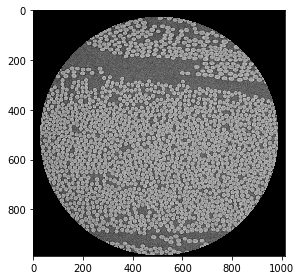

In [2]:
img_name = 'fibres_xcth.png'
img = imread(img_name)
imshow(img)

Text(0.5, 1.0, 'Absolute Difference')

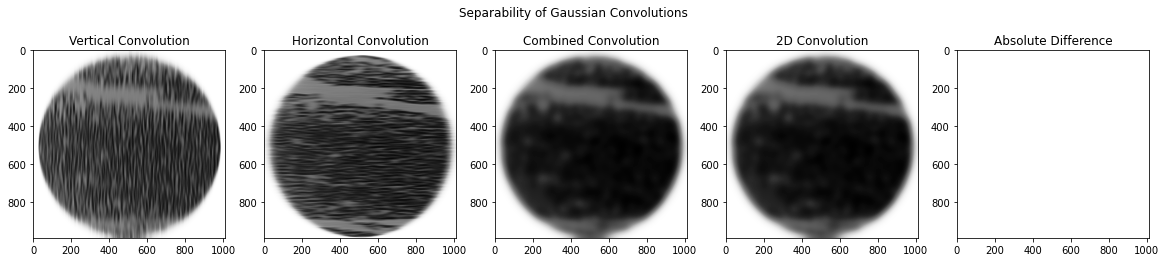

In [18]:
sigma = 20
img_ver = gaussian_filter1d(img, sigma, axis=0)
img_hor = gaussian_filter1d(img, sigma, axis=1)
img_hor_ver = gaussian_filter1d(gaussian_filter1d(img, sigma, axis=0),sigma,axis=1)
img_2d_filter = gaussian_filter(img,sigma)

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(20, 4))
fig.suptitle('Separability of Gaussian Convolutions')
ax1.imshow(img_ver,cmap='Greys')
ax1.set_title("Vertical Convolution")
ax2.imshow(img_hor,cmap='Greys')
ax2.set_title("Horizontal Convolution")
ax3.imshow(img_hor_ver,cmap='Greys')
ax3.set_title("Combined Convolution")
ax4.imshow(img_2d_filter,cmap='Greys')
ax4.set_title("2D Convolution")
ax5.imshow(np.abs(img_2d_filter-img_hor_ver),cmap='Greys')
ax5.set_title("Absolute Difference")

### 2. Derivative of Image
Investigate the difference between the derivative of the image convolved
by a Gaussian and the image convolved with the derivative
of the Gaussian as described in Eq. 1.7. Note that you can compute
the derivative of the image by convolving with the kernel k = [0.5,
0, -0.5].

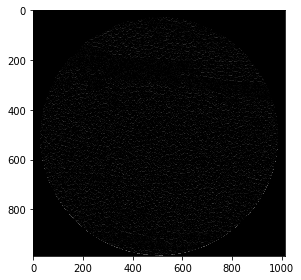

In [6]:
kernel = np.array([0.5,0,-0.5])
derivative = cv2.filter2D(img, -1, kernel)
imshow(derivative)

### 3. Iterative Gaussian Convolutions
Test if a single large convolution with a Gaussian of t = 20 is equal
to ten convolutions with a Gaussian of t = 2.

Text(0.5, 1.0, 'Absolute Difference')

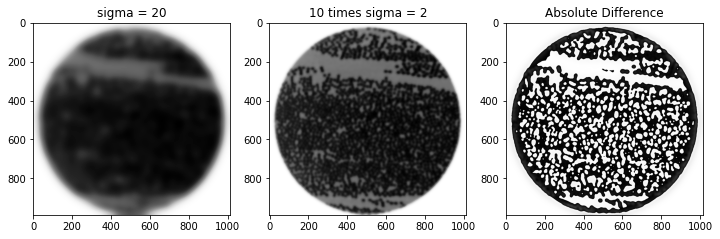

In [19]:
sigma = 20
img_20 = gaussian_filter(img,sigma)
img_10_2 = gaussian_filter(img,sigma/10)
for i in range(9):
    img_10_2 = gaussian_filter(img_10_2,sigma/10)

fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(12,4))
ax1.imshow(img_20,cmap='Greys')
ax1.set_title("sigma = 20")
ax2.imshow(img_10_2,cmap='Greys')
ax2.set_title("10 times sigma = 2")
ax3.imshow(np.abs(img_20-img_10_2),cmap='Greys')
ax3.set_title("Absolute Difference")

### 4. Gaussian Derivatives
Test if convolution with a large Gaussian derivative
$$I*\frac{\partial g(x,y,20)}{\partial x}$$
is equal to convolving with a Gaussian with t = 10 and a Gaussian
derivative with t = 10
$$I*g(x,y,10)*\frac{\partial g(x,y,10)}{\partial x}$$

Text(0.5, 1.0, 'Absolute Difference')

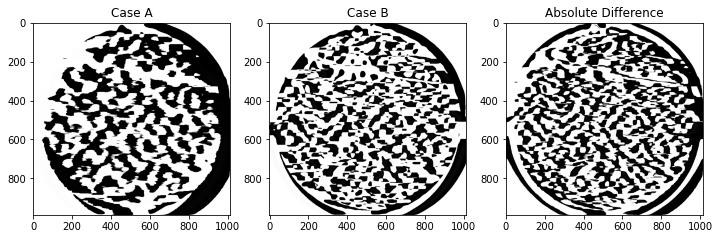

In [28]:
# We may give the keyword 'order' to apply the derivative of a Gaussian
order = 1
img_a = gaussian_filter(img, sigma=20, order=order)
img_b = gaussian_filter(gaussian_filter(img, sigma=10, order=0),
 sigma=10, order=order)

fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(12,4))
ax1.imshow(img_a,cmap='Greys')
ax1.set_title("Case A")
ax2.imshow(img_b,cmap='Greys')
ax2.set_title("Case B")
ax3.imshow(np.abs(img_a-img_b),cmap='Greys')
ax3.set_title("Absolute Difference")


## Task 2: Computing length of segmentation boundary
### 1. Segnmentation Boundary for Fuel Cell
Compute the length of the segmentation boundary for provided
segmentation images of a fuel cell, where one is shown in Figure 1.3.
You can consider avoiding loops and instead using vectorization
provided by Matlab or numpy, which will ensure an efficient and
compact implementation.


16058


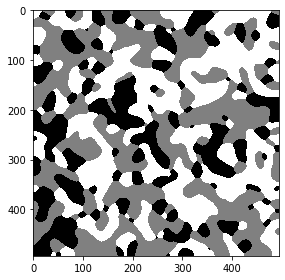

In [72]:
fuel_cells = []
for i in [1,2,3]:
    fuel_cells.append(imread(f'./fuel_cells/fuel_cell_{i}.tif'))
imshow(fuel_cells[0])
def boundary_len(img):
    return sum(sum(img[:-1][:-1] != img[1:][1:]))

print(boundary_len(fuel_cells[0]))

13705
13705.0


Text(0.5, 1.0, '13705 Bounary points')

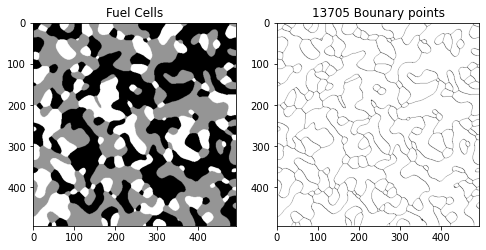

In [74]:
def mark_boundary(img):
    m,n = np.shape(img)
    img2 = np.zeros([m,n])
    count = 0
    for i in range(m-1):
        for j in range(n-1):
            if (img[i,j] != img[i,j+1]) or (img[i,j] != img[i+1,j]):
                img2[i,j]=1
                count = count+1
    return img2,count

bound, count = mark_boundary(fuel_cells[0])
print(count)
fig,(ax1,ax2) = plt.subplots(1, 2,figsize=(8,4))
ax1.imshow(fuel_cells[0],cmap='Greys')
ax1.set_title("Fuel Cells")
ax2.imshow(bound,cmap='Greys')
ax2.set_title(f"{count} Bounary points")

### 2. Implementation as Function
Collect your code in a function which takes segmentation as an input,
and returns the length of the segmentation boundary as an output.
Your function will be useful when we will be working with Markov
random fields later in the course.

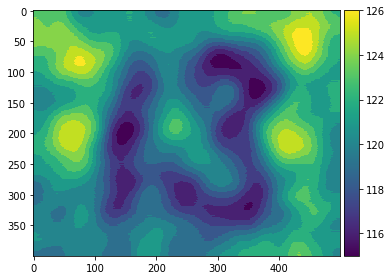

In [80]:
img_name = 'noisy_number.png'
num = imread(img_name)
filtered = gaussian_filter(num,15)
imshow(filtered)